In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
df = pd.read_csv("pima-data.csv")

In [ ]:
df.filter(items=["num_preg", "glucose_conc"])

,num_preg,glucose_conc
0,6,148
1,1,85
2,8,183
3,1,89
4,0,137
...,...,...
763,10,101
764,2,122
765,5,121
766,1,126


In [ ]:
df.shape

(768, 10)

In [ ]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [ ]:
df.isnull().values.any()

False

In [ ]:
correlation_matrix = df.corr()

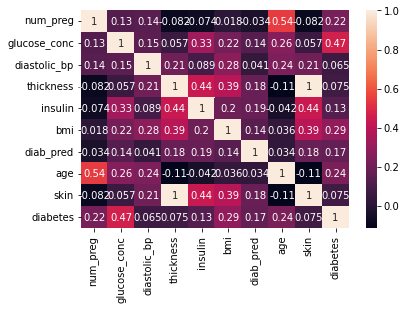

In [ ]:
sns.heatmap(correlation_matrix, annot=True) ##annot ako je true zapisuje vrijednost korelacije u svaku celiju. Da je false bila bi samo boja bez brojplt.show()

skin i thickness imaju korelaciju 1, što znači da jednako utječu na rezultat, a to nije dobro jer su praktički isti i nije dobro da jedan parametar ima dvostruki utjecaj, zato ćemo ukloniti jedan od njih.

In [ ]:
del df['skin']

In [ ]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Da bi rezultat radia sa svim algoritmima, potrebno je True i False rezultate prominit u 1 i 0

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

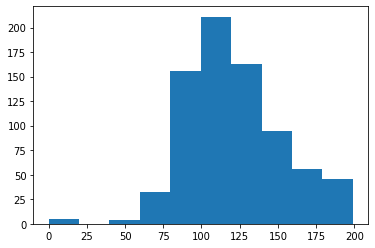

In [ ]:
plt.hist(df["glucose_conc"])

In [ ]:
data_map = {True : 1, False : 0}

In [ ]:
df['diabetes'] = df['diabetes'].map(data_map)

In [ ]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Provjeravamo jesu li podaci dobro raspoređeni radi boljeg predviđanja

In [ ]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

print(round(num_true / (num_true + num_false) * 100, 3), round(num_false  / (num_true + num_false) * 100,3))

34.896 65.104


Naš cilj je predviđanje, stoga govorimo o nadziranom učenju. Što se tiče rezultata, on može biti rezultat regiresije ili klasifikacije. S obzirom da je rezultat binaran, govorimo o klasifikaciji. Algoritam mora podržavati binarnu klasifikaciju. Razmišljamo između Naive Bayes, logističke regiresije i stabla odluke. Naive Bayes pretpostavlja da je svaka značajka jednako važna u predviđanju (npr. dob i krvni tlak su jednako važni faktori).
Logistička regresija iako joj ime implicira da se radi o kontinuiranoj varijabli, ovo je klasifikacijski algoritam. On mjeri povezanost svake od značajki i određuje koliki je njihov utjecaj na rezultat. 
Stablo odluke koristi binarno stablo gdje je svaki čvor jedna odluka.
Uzet ćemo naive Bayes jer je jednostavan, brz

In [ ]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
fcol = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
pred = ['diabetes']

X = df[fcol].values
y = df[pred].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

Iako smo s isnull funkcijom provjerili i vidili da nema null vrijednosti, u nekim stupcima stoji 0 iako je to nemoguće (tipa debljina kože). To znači da je umisto null stavljeno 0.
Imputing je praksa za nadomještanje podataka koji nedostaju

# Podaci se nadomještaju klasom imputer i za vrijednost se stavlja prosjek

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

# Naive Bayes

In [ ]:
nbmodel = GaussianNB()

nbmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
nb_predict_train = nbmodel.predict(X_train)
print(metrics.accuracy_score(y_train, nb_predict_train))

0.7672253258845437


In [ ]:
nb_predict_test = nbmodel.predict(X_test)
print(metrics.accuracy_score(y_test, nb_predict_test))

0.7445887445887446


              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



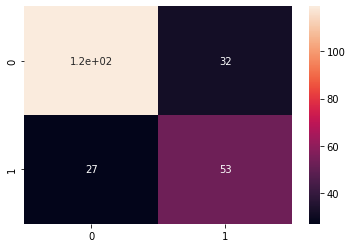

In [ ]:
matrix = metrics.confusion_matrix(y_test, nb_predict_test)
sns.heatmap(matrix, annot=True)
print(metrics.classification_report(y_test, nb_predict_test))

**Accuracy** TP + TN / svi 

**Precision** TP / TP + FP

**Recall** TP / TP + FN

In [ ]:
df[['glucose_conc', 'diabetes']]

,glucose_conc,diabetes
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
...,...,...
763,101,0
764,122,0
765,121,0
766,126,1


In [ ]:
df[(df.diabetes == 1)& (df.glucose_conc >= 125)]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
...,...,...,...,...,...,...,...,...,...
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


Ukupno ih 268 ima dijabetes, od toga ih 183 ima koncentraciju glukoze 125 ili više što je granica između dijabetesa i preddijabetesa. 

Naivni Bayes pretpostavlja da svaka varijabla jednako utječe na rezultat, a to u ovom datasetu nije slučaj.

# Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
tree_predict_train = clf.predict(X_train)
print(metrics.accuracy_score(y_train, tree_predict_train))

1.0


In [ ]:
tree_predict_test = clf.predict(X_test)
print(metrics.accuracy_score(y_test, tree_predict_test))

0.696969696969697


              precision    recall  f1-score   support

           0       0.82      0.72      0.77       151
           1       0.57      0.70      0.63        80

    accuracy                           0.71       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231



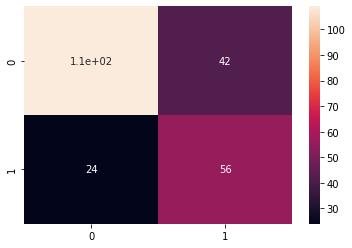

In [ ]:
matrixclf = metrics.confusion_matrix(y_test, tree_predict_test)
sns.heatmap(matrixclf, annot=True)
print(metrics.classification_report(y_test, tree_predict_test))

# Logistic Regression
Logistička regresija se koristi kad se za rezultat očekuje kategorička varijabla. 

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
lr_predict_train = lr_model.predict(X_train)
print(metrics.accuracy_score(y_train, lr_predict_train))

0.7821229050279329


In [ ]:
lr_predict_test = lr_model.predict(X_test)
print(metrics.accuracy_score(y_test, lr_predict_test))

0.7402597402597403


Logistička regresija za rezultat predviđanja ima kategoričke varijable, stoga je najbolji izbor za naš problem

# Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=42)

In [ ]:
rf_predict_train = rf_model.predict(X_train)
print(metrics.accuracy_score(y_train, rf_predict_train))

1.0


In [ ]:
rf_predict_test = rf_model.predict(X_test)
print(metrics.accuracy_score(y_test, rf_predict_test))

0.7532467532467533


              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



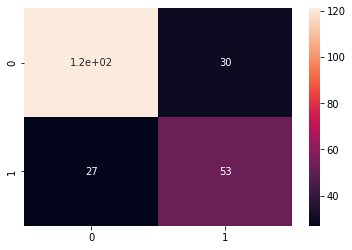

In [ ]:
matrixrf = metrics.confusion_matrix(y_test, rf_predict_test)
sns.heatmap(matrixrf, annot=True)
print(metrics.classification_report(y_test, rf_predict_test))

# Random forest2

In [ ]:
clfr = RandomForestClassifier(
    n_estimators=45, #broj stabala
    max_depth=5,
    max_features='auto', #max_features=sqrt(n_features)
    bootstrap=True,
    n_jobs=-1,
    random_state=0,
    class_weight='balanced'
)

In [ ]:
clfr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=45,
                       n_jobs=-1, random_state=0)

In [ ]:
clfr_predict_train = clfr.predict(X_train)
print(metrics.accuracy_score(y_train, clfr_predict_train))

0.8640595903165735


In [ ]:
clfr_predict_test = clfr.predict(X_test)
print(metrics.accuracy_score(y_test, clfr_predict_test))

0.7619047619047619


              precision    recall  f1-score   support

           0       0.86      0.75      0.81       151
           1       0.63      0.78      0.69        80

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.78      0.76      0.77       231



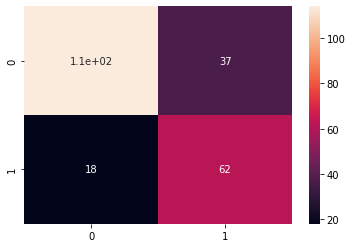

In [ ]:
matrixclfr = metrics.confusion_matrix(y_test, clfr_predict_test)
sns.heatmap(matrixclfr, annot=True)
print(metrics.classification_report(y_test, clfr_predict_test))

Recall je omjer točno klasificiranih pozitivnih i ukupnog broja pozitivnih, znači cilj je da to bude što veći broj

# Logistic regression + CV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(solver='liblinear', n_jobs=-1, random_state=42, Cs=3, cv=36, refit=False)
lr_cv_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=3, cv=36, n_jobs=-1, random_state=42, refit=False,
                     solver='liblinear')

Liblinear je za manje datasetove, n-jobs znači da koristi sve dostupne procesore, cs jačina regularizacije

In [ ]:
lr_cv_predict_train = lr_cv_model.predict(X_train)
print(metrics.accuracy_score(y_train, lr_cv_predict_train))

0.7858472998137802


In [ ]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
print(metrics.accuracy_score(y_test, lr_cv_predict_test))

0.7662337662337663
